In [1]:
import numpy as np
import pandas as pd
import time
import os
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from VaDER.vader import VADER

save_path = os.path.join('test_vader', 'vader.ckpt')

np.random.seed(123)

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

def plot_clustering(latent, clusters):

    clusters = clusters[:latent.shape[0]] # because of weird batch_size

    hex_colors = []
    for _ in np.unique(clusters):
        hex_colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = [hex_colors[int(i)] for i in clusters]

    latent_pca = TruncatedSVD(n_components=2).fit_transform(latent)
    latent_tsne = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(latent)

    plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('PCA on latent')
    plt.show()

    plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('tSNE on latent')
    plt.show()

    return hex_colors

In [4]:
X = np.load('../npy_files/features_All25.npy')
y = np.load('../npy_files/labels_All25.npy')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y)
print(len(X),len(y))
X_train, y_train = X, labs

1878 1878


In [13]:
pd.Series(y).value_counts()

G4     286
F4     254
D7     210
D4     198
D3     195
D2     153
G2     136
E6     118
F3      78
F2      54
G5      44
G6      43
G3      38
E7      35
E8      26
E9       6
E10      4
dtype: int64

In [8]:
# normalize (better for fitting)
for i in np.arange(X_train.shape[2]):
    X_train[:,:,i] = (X_train[:,:,i] - np.mean(X_train[:,:,i])) / np.std(X_train[:,:,i])

In [10]:
W_train = None

In [11]:
vader = VADER(X_train=X_train, W_train=W_train, save_path=save_path, n_hidden=[64,32,8], k=3,
              learning_rate=1e-3, output_activation=None, recurrent=True, cell_type="GRU", batch_size=64)
# pre-train without latent loss
start = time.time()
vader.pre_fit(n_epoch=64, verbose=True)
# train with latent loss
vader.fit(n_epoch=64, verbose=True)
end = time.time()
print("Elapsed: ", end - start)

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 159.25 	rec_loss: 152.72 	lat_loss: 6.53
1 tot_loss: 133.07 	rec_loss: 133.07 	lat_loss: 7.36
2 tot_loss: 116.33 	rec_loss: 116.33 	lat_loss: 31.73
3 tot_loss: 110.07 	rec_loss: 110.07 	lat_loss: 26.61
4 tot_loss: 100.97 	rec_loss: 100.97 	lat_loss: 31.12
5 tot_loss: 91.11 	rec_loss: 91.11 	lat_loss: 46.66
6 tot_loss: 90.82 	rec_loss: 90.82 	lat_loss: 60.63
7 tot_loss: 82.53 	rec_loss: 82.53 	lat_loss: 73.43
8 tot_loss: 64.22 	rec_loss: 64.22 	lat_loss: 98.63
9 tot_loss: 63.04 	rec_loss: 63.04 	lat_loss: 107.76
10 tot_loss: 68.74 	rec_loss: 68.74 	lat_loss: 115.15
11 tot_loss: 60.37 	rec_loss: 60.37 	lat_loss: 109.46
12 tot_loss: 66.95 	rec_loss: 66.95 	lat_loss: 113.33
13 tot_loss: 60.62 	rec_loss: 60.62 	lat_loss: 111.56
14 tot_loss: 66.58 	rec_loss: 66.58 	lat_loss: 112.98
15 tot_loss: 62.94 	rec_loss: 62.94 	lat_loss: 116.39
16 tot_loss: 63.77 	rec_loss: 63.77 	lat_loss: 114.85
17 tot_loss: 63.65 	rec_loss: 63.65 	lat_loss: 116.13
18 tot_loss: 65.55 	rec_loss: 65.55 	l

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 53.57 	rec_loss: 53.57 	lat_loss: 130.72


c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:4", shape=(384,), dtype=int32), values=Tensor("PartitionedCall_3:3", shape=(384, 8), dtype=float32), dense_shape=Tensor("PartitionedCall_3:5", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:1", shape=(192,), dtype=int32), values=Tensor("PartitionedCall_3:0", shape=(192, 8), dtype=float32), dense_shape=Tensor("PartitionedCall_3:2", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Fo

65 tot_loss: 67.44 	rec_loss: 57.31 	lat_loss: 10.14
66 tot_loss: 65.98 	rec_loss: 55.86 	lat_loss: 10.12
67 tot_loss: 63.37 	rec_loss: 54.38 	lat_loss: 9.00
68 tot_loss: 73.44 	rec_loss: 64.18 	lat_loss: 9.26
69 tot_loss: 69.77 	rec_loss: 60.67 	lat_loss: 9.10
70 tot_loss: 66.63 	rec_loss: 57.74 	lat_loss: 8.88
71 tot_loss: 68.87 	rec_loss: 59.76 	lat_loss: 9.11
72 tot_loss: 65.31 	rec_loss: 56.62 	lat_loss: 8.69
73 tot_loss: 67.58 	rec_loss: 58.67 	lat_loss: 8.91
74 tot_loss: 65.32 	rec_loss: 56.58 	lat_loss: 8.74
75 tot_loss: 64.71 	rec_loss: 55.85 	lat_loss: 8.87
76 tot_loss: 68.23 	rec_loss: 59.37 	lat_loss: 8.86
77 tot_loss: 65.90 	rec_loss: 57.10 	lat_loss: 8.79
78 tot_loss: 65.90 	rec_loss: 57.44 	lat_loss: 8.45
79 tot_loss: 67.71 	rec_loss: 59.29 	lat_loss: 8.42
80 tot_loss: 66.32 	rec_loss: 57.89 	lat_loss: 8.43
81 tot_loss: 68.38 	rec_loss: 59.78 	lat_loss: 8.61
82 tot_loss: 63.41 	rec_loss: 54.80 	lat_loss: 8.61
83 tot_loss: 63.41 	rec_loss: 55.01 	lat_loss: 8.40
84 tot_los

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


Elapsed:  62.472649574279785


In [12]:
# get the clusters
c = vader.cluster(X_train)
# get the re-constructions
p = vader.predict(X_train)
# compute the loss given the network
l = vader.get_loss(X_train)

In [13]:
print(pd.Series(c).value_counts())

1    1468
0     341
2      69
dtype: int64


In [14]:
latent = vader.map_to_latent(X_train)

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


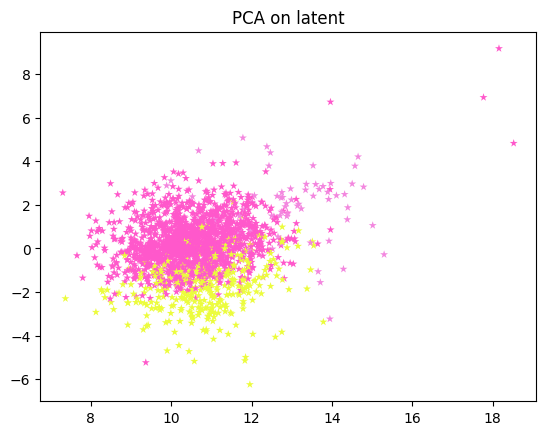

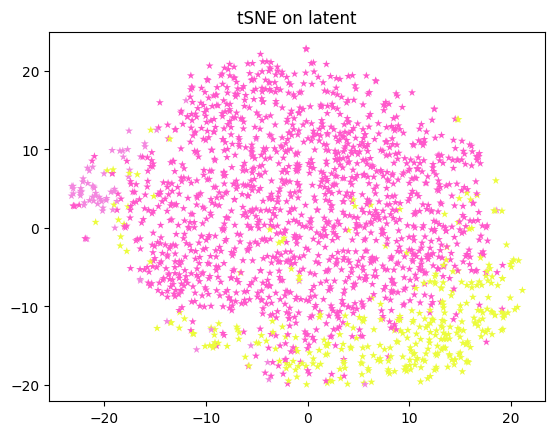

In [15]:
hex = plot_clustering(latent,c)

In [20]:
def plot_dual_clustering(well1, clusters1, well2, clusters2, hex_colors):

    clusters1 = clusters1[:well1.shape[0]] # because of weird batch_size
    clusters2 = clusters2[:well2.shape[0]] # because of weird batch_size
    colors1 = [hex_colors[int(i)] for i in clusters1]
    colors2 = [hex_colors[int(i)] for i in clusters2]

    pca1 = TruncatedSVD(n_components=2).fit_transform(well1)
    tsne1 = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(well1)

    pca2 = TruncatedSVD(n_components=2).fit_transform(well2)
    tsne2 = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(well2)

    fig, axs = plt.subplots(2, 2, figsize=(10,10),sharey=True,sharex=True)

    axs[0,0].scatter(pca1[:, 0], pca1[:, 1], c=colors1, marker='*', linewidths=0)
    axs[0,0].set_title('PCA on well1')

    axs[1,0].scatter(tsne1[:, 0], tsne1[:, 1], c=colors1, marker='*', linewidths=0)
    axs[1,0].set_title('tSNE on well1')

    axs[0,1].scatter(pca2[:, 0], pca2[:, 1], c=colors2, marker='*', linewidths=0)
    axs[0,1].set_title('PCA on well2')

    axs[1,1].scatter(tsne2[:, 0], tsne2[:, 1], c=colors2, marker='*', linewidths=0)
    axs[1,1].set_title('tSNE on well2')

    fig.show()

## specific well clusters

In [17]:
X_G4 = np.array([x for x,well in zip(X,y) if well == "G4"])
specific_c = vader.cluster(X_G4)
specific_latent = vader.map_to_latent(X_G4)
print(pd.Series(specific_c).value_counts())

1    241
0     41
2      4
dtype: int64


In [22]:
X_F4 = np.array([x for x,well in zip(X,y) if well == "D4"])
specific_c2 = vader.cluster(X_F4)
specific_latent2 = vader.map_to_latent(X_F4)
print(pd.Series(specific_c2).value_counts())

1    164
0     27
2      7
dtype: int64


c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\asafavra\AppData\Local\Temp\ipykernel_41748\600860218.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backen

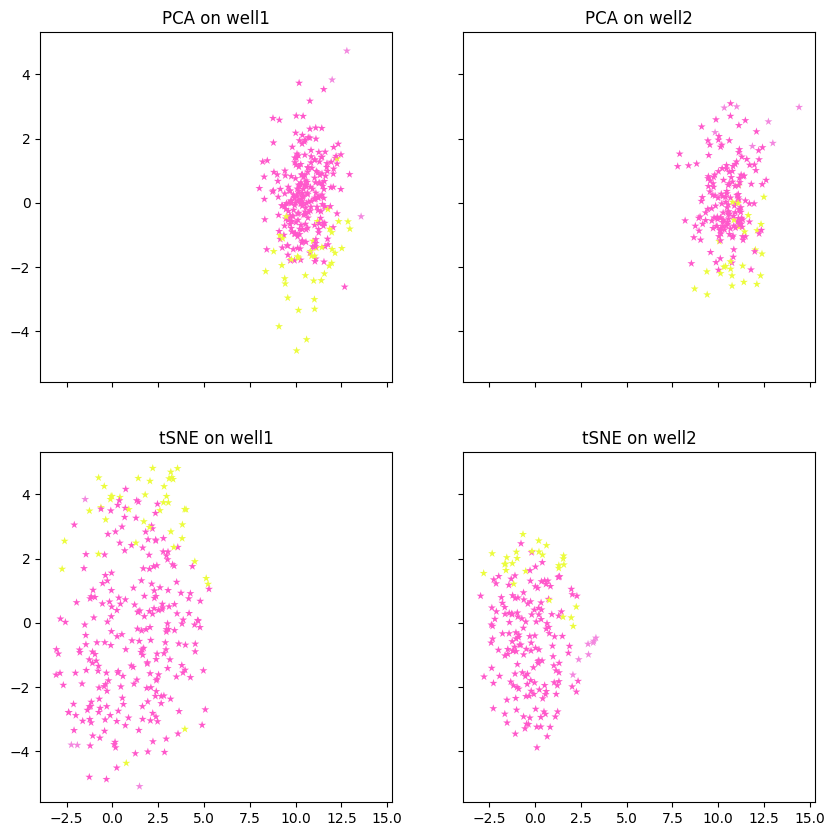

In [23]:
plot_dual_clustering(specific_latent,specific_c,specific_latent2,specific_c2,hex)

## Transformer

In [ ]:
vader = VADER(X_train=X_train, W_train=W_train, save_path=save_path, n_hidden=[64,4], k=3,
              learning_rate=1e-3, output_activation=None, recurrent=True, cell_type="Transformer", batch_size=64,
              cell_params={'d_model': 4, 'num_layers': 1, 'num_heads': 1, 'dff': 16, 'rate': 0.0})
# pre-train without latent loss
start = time.time()
vader.pre_fit(n_epoch=50, verbose=True)
# train with latent loss
vader.fit(n_epoch=50, verbose=True)
end = time.time()
print("Elapsed: ", end - start)

In [41]:
# get the clusters
c_trans = vader.cluster(X_train)
# get the re-constructions
p_trans = vader.predict(X_train)
# compute the loss given the network
l_trans = vader.get_loss(X_train)
latent_trans = vader.map_to_latent(X_train)

In [42]:
print(pd.Series(c_trans).value_counts())

1    1878
dtype: int64


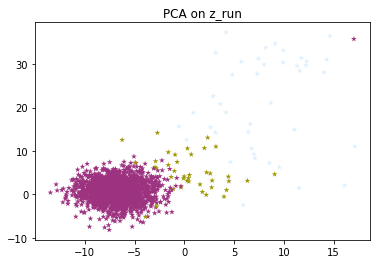

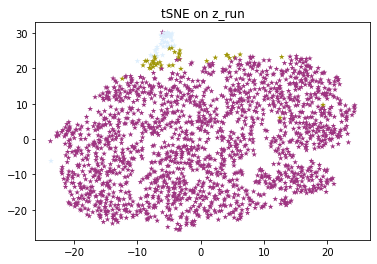

In [39]:
plot_clustering_matplotlib(latent_trans,c_trans)